<a href="https://colab.research.google.com/github/soumyajt1991/Topic-Modeling-on-News-Articles/blob/main/Soumyajit_Das_Team_3_Topic_Modeling_on_News_Articles_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.
Natural Classes: 5 (business, entertainment, politics, sport, tech)


In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import string
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import spacy
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
news=[]
topics=[]

path="/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Day 1/bbc/"

folders=['business','entertainment','politics','sport','tech'] 

for i in folders:
    all_files=os.listdir(path+i)
    for txt_files in all_files:
        files_path=path+i+'/'+txt_files
        with open(files_path,'rb') as f:
            text=f.read()
        news.append(text)
        topics.append(i)

bbc = {'news':news,'topics':topics}
bbc = pd.DataFrame(bbc)

In [4]:
bbc.head()

,news,topics
0,"b'India calls for fair trade rules\n\nIndia, w...",business
1,"b'Steel firm \'to cut\' 45,000 jobs\n\nMittal ...",business
2,b'Call centre users \'lose patience\'\n\nCusto...,business
3,b'Ethiopia\'s crop production up 24%\n\nEthiop...,business
4,"b""Safety alert as GM recalls cars\n\nThe world...",business


In [12]:
bbc.shape

(2225, 2)

In [28]:
bbc.news[0]

b'India calls for fair trade rules\n\nIndia, which attends the G7 meeting of seven leading industrialised nations on Friday, is unlikely to be cowed by its newcomer status.\n\nIn London on Thursday ahead of the meeting, India\'s finance minister, lashed out at the restrictive trade policies of the G7 nations. He objected to subsidies on agriculture that make it hard for developing nations like India to compete. He also called for reform of the United Nations, the World Bank and the IMF.\n\nPalaniappan Chidambaram, India\'s finance minister, argued that these organisations need to take into account the changing world order, given India and China\'s integration into the global economy. He said the issue is not globalisation but "the terms of engagement in globalisation." Mr Chidambaram is attending the G7 meeting as part of the G20 group of nations, which account for two thirds of the world\'s population. At a conference on developing enterprise hosted by UK finance minister Gordon Brown

In [13]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   topics  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [14]:
bbc.describe(include='all').T

,count,unique,top,freq
news,2225,2127,b'Brown outlines third term vision\n\nGordon B...,2
topics,2225,5,sport,511


In [5]:
len(bbc[bbc.duplicated()])

98

In [5]:
# removing duplicate observations
bbc=bbc.drop_duplicates()

In [17]:
bbc.shape

(2127, 2)

In [ ]:
bbc.topics.value_counts()

3    511
0    510
2    417
4    401
1    386
Name: label, dtype: int64

In [20]:
bbc.topics.value_counts(normalize=True)*100

sport            23.742360
business         23.648331
politics         18.946874
entertainment    17.348378
tech             16.314057
Name: topics, dtype: float64

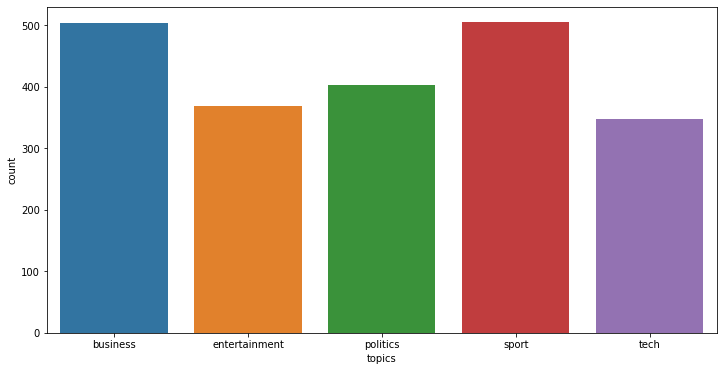

In [132]:
import warnings 
warnings.filterwarnings("ignore")
sns.countplot(bbc['topics'], data=bbc)
plt.show()

In [13]:
bbc1=bbc.copy()

In [14]:
# feature extraction

In [15]:
# creating a column 'length' for total length of strings in each message
bbc1['length']=bbc1['news'].apply(len)

In [36]:
bbc1.head()

,news,topics,length
0,"b'India calls for fair trade rules\n\nIndia, w...",business,1922
1,"b'Steel firm \'to cut\' 45,000 jobs\n\nMittal ...",business,1620
2,b'Call centre users \'lose patience\'\n\nCusto...,business,3854
3,b'Ethiopia\'s crop production up 24%\n\nEthiop...,business,1494
4,"b""Safety alert as GM recalls cars\n\nThe world...",business,1829


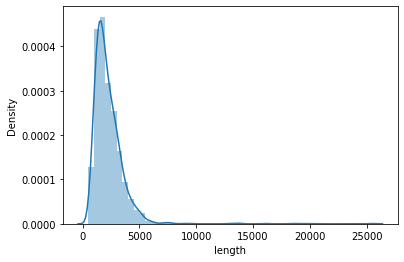

In [41]:
# distplot
sns.distplot(bbc1['length'])
plt.show()

In [125]:
bbc1_business = bbc1[bbc1['topics'] == 'business']
bbc1_entertainment = bbc1[bbc1['topics'] == 'entertainment']
bbc1_politics = bbc1[bbc1['topics'] == 'politics']
bbc1_sport = bbc1[bbc1['topics'] == 'sport']
bbc1_tech = bbc1[bbc1['topics'] == 'tech']

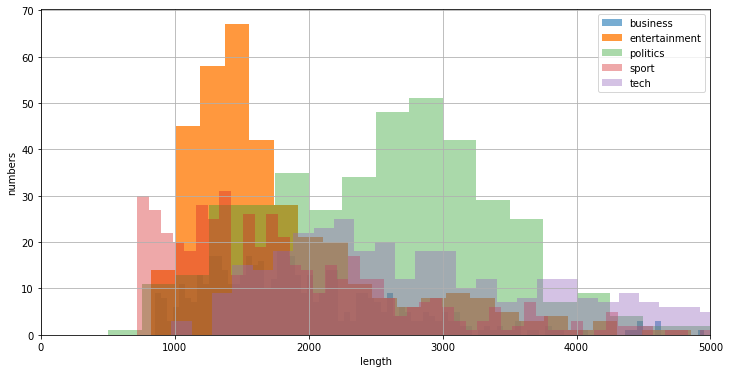

In [13]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 100
plt.hist(bbc1_business['length'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc1_entertainment['length'], alpha = 0.4, bins=bins, label='entertainment')
plt.hist(bbc1_politics['length'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc1_sport['length'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc1_tech['length'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,5000)
plt.grid()
plt.show()

In [21]:
bbc1['news'] = bbc1['news'].astype('str') 

In [16]:
bbc1.news[0]

b'India calls for fair trade rules\n\nIndia, which attends the G7 meeting of seven leading industrialised nations on Friday, is unlikely to be cowed by its newcomer status.\n\nIn London on Thursday ahead of the meeting, India\'s finance minister, lashed out at the restrictive trade policies of the G7 nations. He objected to subsidies on agriculture that make it hard for developing nations like India to compete. He also called for reform of the United Nations, the World Bank and the IMF.\n\nPalaniappan Chidambaram, India\'s finance minister, argued that these organisations need to take into account the changing world order, given India and China\'s integration into the global economy. He said the issue is not globalisation but "the terms of engagement in globalisation." Mr Chidambaram is attending the G7 meeting as part of the G20 group of nations, which account for two thirds of the world\'s population. At a conference on developing enterprise hosted by UK finance minister Gordon Brown

In [ ]:
# Remove HTML tags

In [19]:
import re
def remove_html_tags(text):
	html_pattern = r'<.*?>'
	without_html = re.sub(pattern=html_pattern, repl=' ', string=text)
	return without_html

In [23]:
bbc1['news'] = bbc1['news'].apply(remove_html_tags)

In [25]:
# Remove HTML tags

In [26]:
def remove_urls(text):
	url_pattern = r'https?://\S+|www\.\S+' 
	without_urls = re.sub(pattern=url_pattern, repl=' ', string=text)
	return without_urls

In [27]:
bbc1['news'] = bbc1['news'].apply(remove_urls)

In [24]:
# Convert accented characters to ASCII characters

In [29]:
pip install Unidecode

     |████████████████████████████████| 245kB 5.4MB/s 


In [30]:
import unidecode

def accented_to_ascii(text):
	text = unidecode.unidecode(text)
	return text

In [31]:
bbc1['news'] = bbc1['news'].apply(accented_to_ascii)

In [32]:
# remove punctuations

In [33]:
def remove_punctuation(text):    
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

In [34]:
bbc1['news'] = bbc1['news'].apply(remove_punctuation)

In [35]:
# Remove numbers

In [36]:
def remove_numbers(text):
	number_pattern = r'\d+'
	without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
	return without_number

In [37]:
bbc1['news'] = bbc1['news'].apply(remove_numbers)

In [39]:
# Lowercase all texts

In [40]:
def lower_case_convertion(text):
	lower_text = text.lower()
	return lower_text

In [42]:
bbc1['news'] = bbc1['news'].apply(lower_case_convertion)

In [ ]:
# Split attached words

In [61]:
def split_word(text):
  split = re.split("([A-Z][a-z]+[^A-Z]*)",text)
  return " ".join(split)

In [64]:
bbc1['news'] = bbc1['news'].apply(split_word)

In [65]:
# Removing single characters

In [66]:
def remove_single_char(text):
	single_char_pattern = r'\s+[a-zA-Z]\s+'
	without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
	return without_sc

In [67]:
bbc1['news'] = bbc1['news'].apply(remove_single_char)

In [69]:
# Remove extra whitespaces

In [70]:
def remove_extra_spaces(text):
	space_pattern = r'\s+'
	without_space = re.sub(pattern=space_pattern, repl=" ", string=text)
	return without_space

In [71]:
bbc1['news'] = bbc1['news'].apply(remove_extra_spaces)

In [ ]:
# Standardizing and Spelling correction

In [75]:
 pip install autocorrect

     |████████████████████████████████| 624kB 6.4MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.3.0-cp36-none-any.whl size=621588 sha256=d14905d188c684401e90fee20760ac16bfa6b778def63e34edbf81f42bdb842d
  Stored in directory: /root/.cache/pip/wheels/cc/1c/30/6b0199afbd20eef5959f5eaa0ead86aeef84391740482b2279
Successfully built autocorrect


In [77]:
import itertools
from autocorrect import Speller

def correction(text):
  standz = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text)) 
  spell = Speller(lang='en') 
  correct_spell=spell(standz) 
  return correct_spell

In [80]:
bbc2=bbc1.copy()

In [ ]:
bbc2['news'] = bbc2['news'].apply(correction)

In [ ]:
bbc2.news[0]

In [ ]:
# Lemmatization

In [96]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

def lemmatize_word(text): 
	lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text.split()] 
	return " ".join(lemmas) 

In [101]:
bbc1['news'] = bbc1['news'].apply(lemmatize_word)

In [ ]:
# remove stopwords

In [105]:
from nltk.corpus import stopwords
import spacy
import gensim

# list of stopwords from nltk
stopwords_nltk = list(stopwords.words('english'))
sp = spacy.load('en_core_web_sm')
# list of stopwords from spacy
stopwords_spacy = list(sp.Defaults.stop_words)
# list of stopwords from gensim
stopwords_gensim = list(gensim.parsing.preprocessing.STOPWORDS)

# unique stopwords from all stopwords
all_stopwords = []
all_stopwords.extend(stopwords_nltk)
all_stopwords.extend(stopwords_spacy)
all_stopwords.extend(stopwords_gensim)
# all unique stop words
all_stopwords = list(set(all_stopwords))



def stop_words(text):  
  text = [wd.lower() for wd in text.split() if wd.lower() not in all_stopwords]
  return " ".join(text)

In [106]:
bbc1['news'] = bbc1['news'].apply(stop_words)

In [ ]:
# remove frequent words

In [117]:
freq = pd.Series(' '.join(bbc1['news']).split()).value_counts()[:20]
freq

mr            2595
people        1856
new           1831
game          1517
year          1461
use           1382
win           1357
time          1355
xa            1335
xc            1325
come          1164
play          1142
years         1125
company       1049
film          1023
tell          1013
work          1009
government     981
world          929
want           920
dtype: int64

In [118]:
freq_words = ['mr','use','xa','xc','tell']

In [119]:
bbc1['news'] = bbc1['news'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_words))

In [120]:
bbc1.news[0]

'bindia fair trade rulesnnindia attend meet seven lead industrialise nations friday unlikely cow newcomer statusnnin london thursday ahead meet indias finance minister lash restrictive trade policies nations object subsidies agriculture hard develop nations like india compete reform unite nations world bank imfnnpalaniappan chidambaram indias finance minister argue organisations need account change world order india chinas integration global economy issue globalisation term engagement globalisation chidambaram attend meet group nations account thirds worlds population conference develop enterprise host uk finance minister gordon brown friday favour float exchange rat help countries cope economic shock flexible exchange rate channel absorb positive negative shock conference india china brazil south africa russia invite meet place london friday saturday china expect face renew pressure abandon fix exchange rate nations particular blame surge cheap chinese export countries try fix exchang

In [122]:
# feature extraction

In [ ]:
# length of documents

In [123]:
bbc1['final_length']=bbc1['news'].apply(len)
bbc1.head()

,news,topics,length,final_length
0,bindia fair trade rulesnnindia attend meet sev...,business,1922,1174
1,bsteel firm cut jobsnnmittal steel worlds larg...,business,1620,944
2,bcall centre users lose patiencenncustomers tr...,business,3854,2109
3,bethiopias crop production nnethiopia produce ...,business,1494,1008
4,bsafety alert gm recall carsnnthe worlds bigge...,business,1829,1173


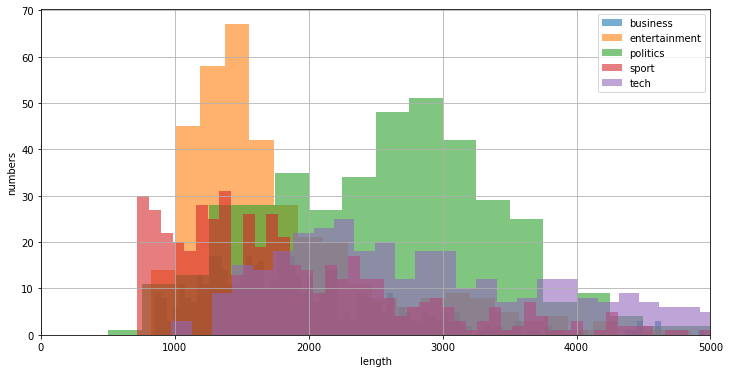

In [128]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 100
plt.hist(bbc1_business['length'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc1_entertainment['length'], alpha = 0.6, bins=bins, label='entertainment')
plt.hist(bbc1_politics['length'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc1_sport['length'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc1_tech['length'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,5000)
plt.grid()
plt.show()

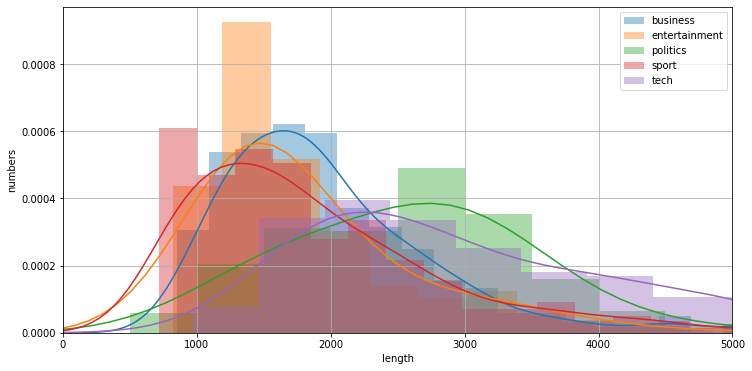

In [138]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
sns.distplot(bbc1_business['length'],label='business')
sns.distplot(bbc1_entertainment['length'],label='entertainment')
sns.distplot(bbc1_politics['length'],label='politics')
sns.distplot(bbc1_sport['length'],label='sport')
sns.distplot(bbc1_tech['length'],label='tech')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,5000)
plt.grid()
plt.show()

No handles with labels found to put in legend.


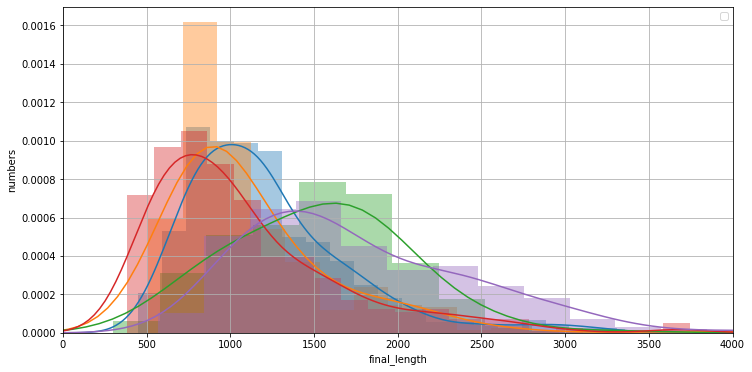

In [135]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
sns.distplot(bbc1_business['final_length'],label='business')
sns.distplot(bbc1_entertainment['final_length'],label='entertainment')
sns.distplot(bbc1_politics['final_length'],label='politics')
sns.distplot(bbc1_sport['final_length'],label='sport')
sns.distplot(bbc1_tech['final_length'],label='tech')
plt.xlabel('final_length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,4000)
plt.grid()
plt.show()

In [ ]:
# number of words

In [139]:
bbc1['word_count'] = bbc1['news'].apply(lambda x: len(str(x).split(" ")))
bbc1.head()

,news,topics,length,final_length,word_count
0,bindia fair trade rulesnnindia attend meet sev...,business,1922,1174,157
1,bsteel firm cut jobsnnmittal steel worlds larg...,business,1620,944,125
2,bcall centre users lose patiencenncustomers tr...,business,3854,2109,286
3,bethiopias crop production nnethiopia produce ...,business,1494,1008,126
4,bsafety alert gm recall carsnnthe worlds bigge...,business,1829,1173,163


In [144]:
bbc1_business = bbc1[bbc1['topics'] == 'business']
bbc1_entertainment = bbc1[bbc1['topics'] == 'entertainment']
bbc1_politics = bbc1[bbc1['topics'] == 'politics']
bbc1_sport = bbc1[bbc1['topics'] == 'sport']
bbc1_tech = bbc1[bbc1['topics'] == 'tech']

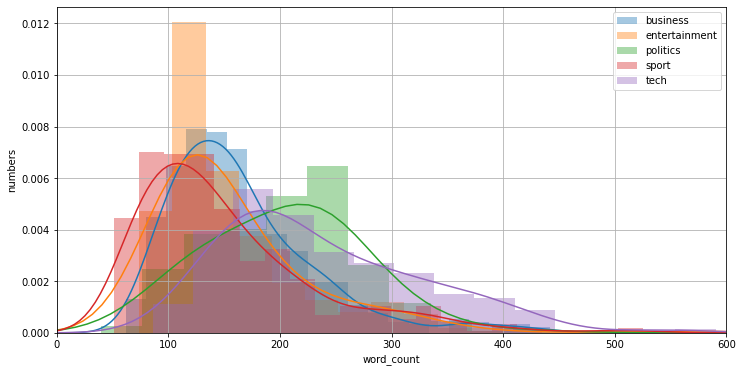

In [147]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
sns.distplot(bbc1_business['word_count'],label='business')
sns.distplot(bbc1_entertainment['word_count'],label='entertainment')
sns.distplot(bbc1_politics['word_count'],label='politics')
sns.distplot(bbc1_sport['word_count'],label='sport')
sns.distplot(bbc1_tech['word_count'],label='tech')
plt.xlabel('word_count')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,600)
plt.grid()
plt.show()

In [ ]:
# Average Word Length

In [151]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
bbc1['avg_word'] = bbc1['news'].apply(lambda x: avg_word(x))
bbc1.head()

,news,topics,length,final_length,word_count,char_count,avg_word
0,bindia fair trade rulesnnindia attend meet sev...,business,1922,1174,157,1174,6.484076
1,bsteel firm cut jobsnnmittal steel worlds larg...,business,1620,944,125,944,6.560000
2,bcall centre users lose patiencenncustomers tr...,business,3854,2109,286,2109,6.377622
3,bethiopias crop production nnethiopia produce ...,business,1494,1008,126,1008,7.007937
4,bsafety alert gm recall carsnnthe worlds bigge...,business,1829,1173,163,1173,6.202454


In [152]:
bbc1_business = bbc1[bbc1['topics'] == 'business']
bbc1_entertainment = bbc1[bbc1['topics'] == 'entertainment']
bbc1_politics = bbc1[bbc1['topics'] == 'politics']
bbc1_sport = bbc1[bbc1['topics'] == 'sport']
bbc1_tech = bbc1[bbc1['topics'] == 'tech']

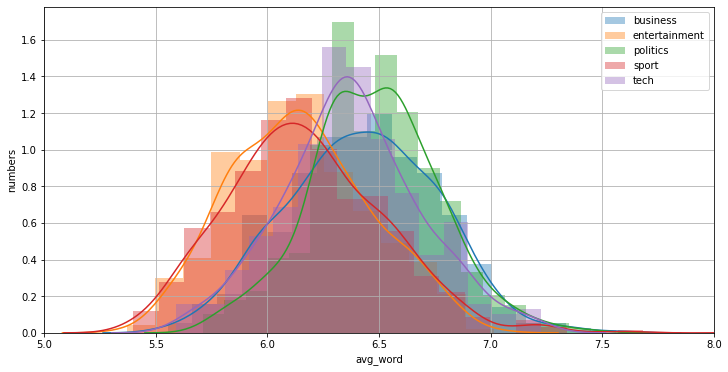

In [158]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
sns.distplot(bbc1_business['avg_word'],label='business')
sns.distplot(bbc1_entertainment['avg_word'],label='entertainment')
sns.distplot(bbc1_politics['avg_word'],label='politics')
sns.distplot(bbc1_sport['avg_word'],label='sport')
sns.distplot(bbc1_tech['avg_word'],label='tech')
plt.xlabel('avg_word')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(5,8)
plt.grid()
plt.show()

In [162]:
# vectorization

In [176]:
vectorizer = TfidfVectorizer(max_df = 0.8,min_df = 2,max_features=5000)
small_document_term_matrix = vectorizer.fit_transform(bbc1['news'])

In [177]:
# LDA model
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

lda = LatentDirichletAllocation(max_iter=100)
lda.fit(small_document_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=100,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [173]:
!pip install pyLDAvis

In [174]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [178]:
lda_panel = pyLDAvis.sklearn.prepare(lda, small_document_term_matrix,vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6      32.420952   8.115230       1        1  60.601519
1       0.648955  71.707100       2        1  14.045919
0      71.019684   9.971006       3        1  10.305550
9       3.785981  33.185135       4        1   5.507118
2     -42.666500  -9.222070       5        1   2.043919
7      -3.621689 -43.526516       6        1   1.995998
8      -3.632402  -4.171708       7        1   1.644921
5     -36.584400  35.804413       8        1   1.349597
4      44.391380  50.615383       9        1   1.309839
3      40.235809 -31.591665      10        1   1.195620, topic_info=             Term       Freq      Total Category  logprob  loglift
1693         film  31.000000  31.000000  Default  30.0000  30.0000
430          best  23.000000  23.000000  Default  29.0000  29.0000
490            bn  27.000000  27.000000  Default  28.0000  28.0000
336         award  19.000000  19.000000  Default  27.0000  27.0000
4225         star  17.000000  17.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
4614         trio   0.038813   1.824701  Topic10  -8.5398   0.5761
4447    telephony   0.038806   1.164290  Topic10  -8.5400   1.0252
3528       qantas   0.038805   1.643720  Topic10  -8.5400   0.6803
4332  suggestions   0.038802   1.984563  Topic10  -8.5401   0.4918
13         absorb   0.038800   1.128285  Topic10  -8.5401   1.0565

[439 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         7  0.899282    abbas
16        1  0.248622  academy
16        4  0.745867  academy
44        4  0.994969    actor
45        4  0.686329   actors
...     ...       ...      ...
4935      1  0.967819    world
4967      1  0.738664     year
4967      3  0.246221     year
4973      1  0.979665    years
4994      3  0.921080    yukos

[431 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 1, 10, 3, 8, 9, 6, 5, 4])

In [ ]:
# NMF

In [ ]:
from sklearn.decomposition import NMF
cls = NMF()
cls.fit(small_document_term_matrix)

In [ ]:
lda_panel1 = pyLDAvis.sklearn.prepare(cls, small_document_term_matrix,vectorizer,mds='tsne')
lda_panel1

In [31]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

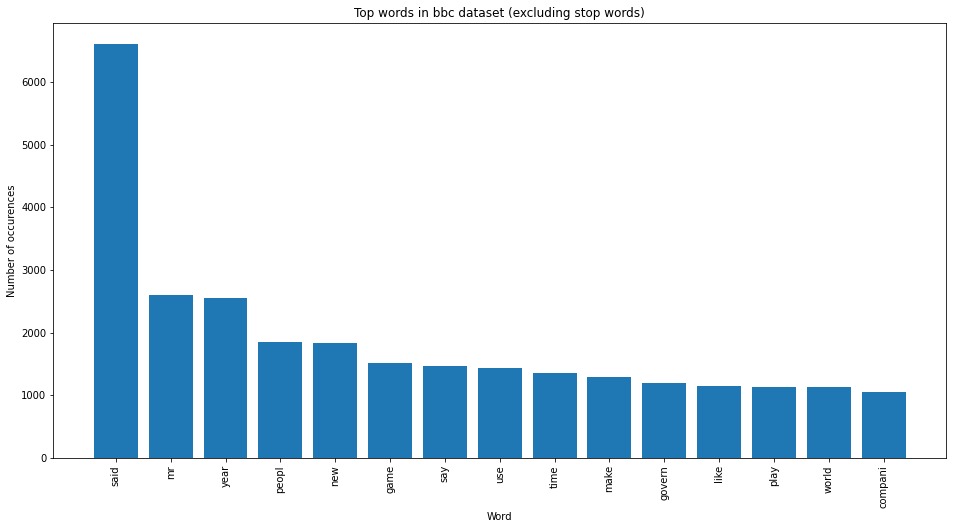

In [34]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=bbc1['news'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in bbc dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [36]:
vectorizer = TfidfVectorizer(max_df = 0.8,min_df = 20)
news1 = vectorizer.fit_transform(bbc1['news'])

In [38]:
print(vectorizer.get_feature_names())

['00', '003', '007', '01', '0100', '0130', '02', '027', '03', '030', '0305', '04', '0400', '05', '06', '07', '08', '0800', '09', '0900', '10', '100', '1000', '10000', '100000', '10000m', '1000m', '1000th', '100bn', '100m', '100mn', '100s', '101', '1015', '102', '1020', '103', '1030', '103bn', '104', '104000', '1044', '106', '107', '107bn', '108', '1080', '109', '10bn', '10day', '10game', '10km', '10m', '10minut', '10month', '10n', '10th', '10year', '11', '110', '1100', '11000', '110000', '110m', '112', '113', '1130', '113bn', '114', '115', '115bn', '117', '118', '118m', '119', '11bn', '11m', '11pm', '11th', '12', '120', '1200', '12000', '120000', '120gb', '120m', '121', '1218', '123', '1230', '124', '125', '12500', '125000', '125m', '126', '12600', '127', '127th', '128', '129', '12bn', '12member', '12nation', '12th', '12yearold', '13', '130', '1300', '13000', '130000', '131', '132', '1324', '133', '133bn', '133m', '134', '135', '136', '136m', '137', '138', '13bn', '13m', '13n', '13nnso

In [39]:
len(vectorizer.get_feature_names())

14197

In [42]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [ ]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, small_document_term_matrix,small_count_vectorizer,mds='tsne')
lda_panel

In [ ]:
# Collect vocabulary count

In [ ]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['text'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [4]:
#Store the vocab and counts in a pandas dataframe

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [ ]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 2)
X = vectorizer.fit_transform(message['tokenized_message'])

In [ ]:
# list of unique words found by the vectorizer

In [ ]:
print(vectorizer.get_feature_names())

In [ ]:
len(vectorizer.get_feature_names())

In [ ]:
# number of most influencing words to display per topic
n_top_words = 15

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    # topic_vec.argsort() produces a new array
    # in which word_index with the least score is the
    # first array element and word_index with highest
    # score is the last array element. Then using a
    # fancy indexing [-1: -n_top_words-1:-1], we are
    # slicing the array from its end in such a way that
    # top `n_top_words` word_index with highest scores
    # are returned in desceding order
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

In [ ]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [ ]:
count_vectorizer = CountVectorizer()
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['news'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in df[df['type']=='sport']['news']])
wordCloud = WordCloud(width=500, height=300, background_color="white", random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
n_topics = 5

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=0.1)
features = vec.fit_transform(df.text)

In [ ]:
df1 = pd.DataFrame(features.todense() , columns=vec.get_feature_names())

In [ ]:
df1.head()

In [5]:
# NMF